In [1]:
import pandas as pd 
import csv
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
airq1701_1801=pd.read_csv('airQuality_201701-201801.csv')
airq1701_1801.head()
airq1701_1801.columns

Index(['stationId', 'utc_time', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2'], dtype='object')

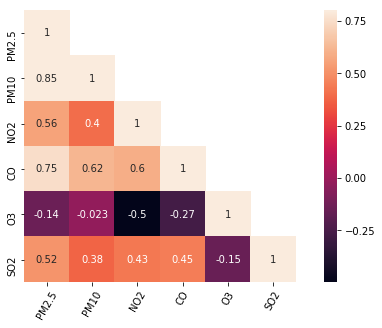

In [69]:
corrMat = airq1701_1801[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(10,5))
plt.xticks(rotation=60)
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

In [70]:
#airq1701_1801.head(20)

In [71]:
#prefix of stations
#airq1701_1801['stationId'] = airq1701_1801['stationId'].apply(lambda x: x.split('_')[0])

In [104]:
aoti_pm25=airq1701_1801.loc[airq1701_1801['stationId'] == 'aotizhongxin_aq']
aoti_pm25=aoti_pm25[(aoti_pm25['utc_time'] >='2017-04-03 00:00:00')& (aoti_pm25['utc_time'] < '2017-04-03 23:00:00')]

time=aoti_pm25['utc_time']
pm25=aoti_pm25['PM2.5']

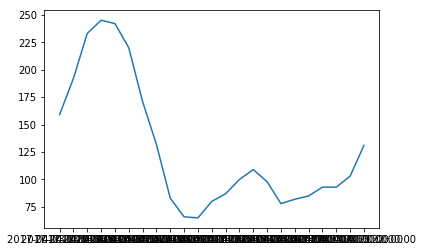

In [105]:
plt.plot(time,pm25)#0501-0502
plt.show()

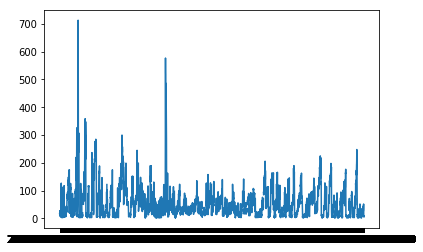

In [75]:
plt.plot(time,pm25)#jan to dec
plt.show()

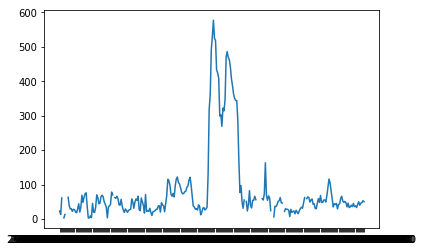

In [33]:
plt.plot(time,pm25)#0430-05055
plt.show()

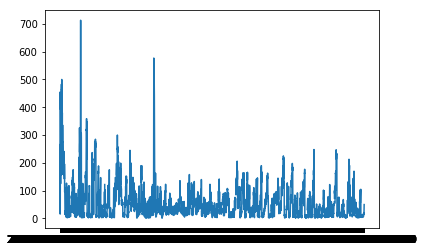

In [21]:

plt.plot(time,pm25)
plt.show()

In [139]:
#merge stagtion id with long and lat
stationRead=pd.read_csv('Beijing_AirQuality_Stations_final1.csv')
stationRead.head()

,stationId,longitude,latitude
0,dongsi_aq,116.417,39.929
1,tiantan_aq,116.407,39.886
2,guanyuan_aq,116.339,39.929
3,wanshouxigong_aq,116.352,39.878
4,aotizhongxin_aq,116.397,39.982


In [141]:
airq1701_1801_longlat=pd.merge(airq1701_1801, stationRead, on='stationId', how='left')
airq1701_1801_longlat.to_csv('airq1701_1801_longlat.csv')
airq1701_1801_longlat

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,longitude,latitude
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0,116.397,39.982
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0,116.397,39.982
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0,116.397,39.982
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0,116.397,39.982
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0,116.397,39.982
5,aotizhongxin_aq,2017-01-01 19:00:00,429.0,NaN,141.0,6.5,3.0,9.0,116.397,39.982
6,aotizhongxin_aq,2017-01-01 20:00:00,211.0,NaN,110.0,3.3,NaN,11.0,116.397,39.982
7,aotizhongxin_aq,2017-01-01 21:00:00,116.0,NaN,87.0,2.2,4.0,13.0,116.397,39.982
8,aotizhongxin_aq,2017-01-01 22:00:00,51.0,NaN,58.0,1.3,26.0,14.0,116.397,39.982
9,aotizhongxin_aq,2017-01-01 23:00:00,38.0,NaN,55.0,1.1,28.0,14.0,116.397,39.982


In [22]:
stationRead.set_index('stationId',inplace=True)
airq1701_1801.set_index('stationId',inplace=True)

In [23]:
# creating pm label.csv
# airq1701_1801_pm2=airq1701_1801.drop(['PM10','NO2','CO','O3','SO2'],axis=1)
# airq1701_1801_pm2.to_csv('1701_1801_pm2.5.csv',index=False)

In [24]:
# airq1701_1801_pm10=airq1701_1801.drop(['PM2.5','NO2','CO','O3','SO2'],axis=1)
# airq1701_1801_pm10.to_csv('1701_1801_pm10.csv',index=False)

In [25]:
# airq1701_1801_pmO3=airq1701_1801.drop(['PM2.5','PM10','NO2','CO','SO2'],axis=1)
# airq1701_1801_pmO3.to_csv('1701_1801_pmO3.csv',index=False)

In [26]:
airq1701_1801.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311010 entries, aotizhongxin_aq to zhiwuyuan_aq
Data columns (total 7 columns):
utc_time    311010 non-null object
PM2.5       290621 non-null float64
PM10        227747 non-null float64
NO2         292359 non-null float64
CO          268197 non-null float64
O3          290589 non-null float64
SO2         292462 non-null float64
dtypes: float64(6), object(1)
memory usage: 19.0+ MB


In [27]:
airq1701_1801.isnull().sum()

utc_time        0
PM2.5       20389
PM10        83263
NO2         18651
CO          42813
O3          20421
SO2         18548
dtype: int64

In [28]:
# airq1802_1803=pd.read_csv('airQuality_201802-201803.csv')
# airq1802_1803.head()

In [29]:
# airq1804=pd.read_csv('airQuality_201804.csv')
# airq1804.head()

In [30]:
#airq1804.info()

In [31]:
#check the distinct dates
airq1701_1801['utc_time'] = airq1701_1801['utc_time'].apply(lambda x: x.split(' ')[0])
#airq1701_1801.utc_time.unique()

In [32]:
gridWeather1701_1803=pd.read_csv('gridWeather_201701-201803.csv')
gridWeather1701_1803.head()
#gridWeather1701_1803.info()


,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01 00:00:00,-5.47,984.73,76.60,53.71,3.53
1,beijing_grid_001,115.0,39.1,2017-01-01 00:00:00,-5.53,979.33,75.40,43.59,3.11
2,beijing_grid_002,115.0,39.2,2017-01-01 00:00:00,-5.70,963.14,71.80,0.97,2.75
3,beijing_grid_003,115.0,39.3,2017-01-01 00:00:00,-5.88,946.94,68.20,327.65,3.84
4,beijing_grid_004,115.0,39.4,2017-01-01 00:00:00,-5.34,928.80,58.81,317.85,6.14


In [33]:
# #group by stationame 
# my_list=gridWeather1701_1803.groupby('stationName')['utc_time'].apply(list)

# my_list1 = pd.DataFrame(my_list)

# my_list1

In [34]:
#my_list1.reset_index()

# a = my_list.iloc[414]
# b  = pd.DataFrame(a)
# c = b[0].apply(lambda x: x.split(' ')[0])
# #c
#c.unique()

In [35]:
# for i in range(0,len(gridWeather1701_1803)):
#     if gridWeather1701_1803['stationName']=='beijing_grid_414':
#         utc_time = gridWeather1701_1803[]

In [36]:
#gridWeather1701_1803.isnull().sum()
gridWeather1701_1803.utc_time.unique().shape

(10806,)

In [37]:
obWeather1701_1801=pd.read_csv('observedWeather_201701-201801.csv')
obWeather1701_1801.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [38]:
obWeather1701_1801['station_id'] = obWeather1701_1801['station_id'].apply(lambda x: x.split('_')[0])

In [39]:
#unique stations 
obs_uniq = obWeather1701_1801.station_id.unique()

In [40]:
sample_sub = pd.read_csv('sample_submission.csv')

In [41]:
sample_sub['test_id'] = sample_sub['test_id'].apply(lambda x: x.split('_')[0])

In [42]:
sample_sub.test_id.unique()

array(['dongsi', 'tiantan', 'guanyuan', 'wanshouxigong', 'aotizhongxin',
       'nongzhanguan', 'wanliu', 'beibuxinqu', 'zhiwuyuan',
       'fengtaihuayuan', 'yungang', 'gucheng', 'fangshan', 'daxing',
       'yizhuang', 'tongzhou', 'shunyi', 'pingchang', 'mentougou',
       'pinggu', 'huairou', 'miyun', 'yanqin', 'dingling', 'badaling',
       'miyunshuiku', 'donggaocun', 'yongledian', 'yufa', 'liulihe',
       'qianmen', 'yongdingmennei', 'xizhimenbei', 'nansanhuan',
       'dongsihuan'], dtype=object)

In [48]:
airq1701_1801_longlat.head()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,longitude,latitude
0,aotizhongxin_aq,1/1/17 14:00,453.0,467.0,156.0,7.2,3.0,9.0,116.397,39.982
1,aotizhongxin_aq,1/1/17 15:00,417.0,443.0,143.0,6.8,2.0,8.0,116.397,39.982
2,aotizhongxin_aq,1/1/17 16:00,395.0,467.0,141.0,6.9,3.0,8.0,116.397,39.982
3,aotizhongxin_aq,1/1/17 17:00,420.0,484.0,139.0,7.4,3.0,9.0,116.397,39.982
4,aotizhongxin_aq,1/1/17 18:00,453.0,520.0,157.0,7.6,4.0,9.0,116.397,39.982


In [49]:
#unique airquality longitude
air_uniq_Long=airq1701_1801_longlat.longitude.unique()
air_uniq_Long=np.round(air_uniq_Long,1)
air_uniq_Long

array([116.4, 116. , 116.2, 116.4, 116.2, 117.1, 116.4, 116.5, 116.1,
       116.3, 116.3, 116.2, 116.6, 116. , 116.1, 116.8, 116.9, 116.4,
       116.5, 116.2, 117.1, 116.4, 116.7, 116.4, 116.7, 116.3, 116.4,
       116.3, 116. , 116.5, 116.4, 116.8, 116.3, 116.1, 116.2])

In [50]:
from decimal import Decimal
import numpy as np
obs_uniq_Long= obWeather1701_1801.longitude.unique()
obs_uniq_Long=np.round(obs_uniq_Long,1)
obs_uniq_Long

array([116.6, 116.3, 116. , 116.9, 116.6, 117.1, 117.1, 116.8, 116.5,
       116.2, 115.7, 116.2, 116.5, 116.2, 116.2, 116.4, 116.2, 115.7])

In [51]:
len(obs_uniq_Long)

18

In [52]:
#example finding distance
# from scipy.spatial import distance
# a = (1, 2, 3)
# b = (4, 5, 6)
# dst = distance.euclidean(a, b)
# dst

In [35]:
aq1802a_1803=pd.read_csv('airQuality_201802-201803.csv')
aq1802a_1803.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 8 columns):
stationId    49420 non-null object
utc_time     49420 non-null object
PM2.5        46350 non-null float64
PM10         36508 non-null float64
NO2          46351 non-null float64
CO           46089 non-null float64
O3           46109 non-null float64
SO2          46304 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.0+ MB


# closest grids/observaed station to the aq station

In [36]:
#adding col headers to csv
g_weather=pd.read_csv('Beijing_grid_weather_station.csv')

g_weather.columns = ["Id","longitude","latitude"]
#g_weather

In [37]:
# g_weather = g_weather[['gridId', 'longitude', 'latitude']]
# g_weather.to_csv('Beijing_grid_weather_station.csv', index=False)
g_weather

,Id,longitude,latitude
0,beijing_grid_000,115.0,39.0
1,beijing_grid_001,115.0,39.1
2,beijing_grid_002,115.0,39.2
3,beijing_grid_003,115.0,39.3
4,beijing_grid_004,115.0,39.4
5,beijing_grid_005,115.0,39.5
6,beijing_grid_006,115.0,39.6
7,beijing_grid_007,115.0,39.7
8,beijing_grid_008,115.0,39.8
9,beijing_grid_009,115.0,39.9


In [38]:
with open('Beijing_AirQuality_Stations_final1.csv','rU') as g: 
    reader = csv.reader(g)
    next(reader, None)  # skip the headers
    aq_dict = {rows[0]:rows[1:] for rows in reader}

#mydict['beijing_grid_000'][1]
aq_dict

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


{'dongsi_aq': ['116.417', '39.929'],
 'tiantan_aq': ['116.407', '39.886'],
 'guanyuan_aq': ['116.339', '39.929'],
 'wanshouxigong_aq': ['116.352', '39.878'],
 'aotizhongxin_aq': ['116.397', '39.982'],
 'nongzhanguan_aq': ['116.461', '39.937'],
 'wanliu_aq': ['116.287', '39.987'],
 'beibuxinqu_aq': ['116.174', '40.09'],
 'zhiwuyuan_aq': ['116.207', '40.002'],
 'fengtaihuayuan_aq': ['116.279', '39.863'],
 'yungang_aq': ['116.146', '39.824'],
 'gucheng_aq': ['116.184', '39.914'],
 'fangshan_aq': ['116.136', '39.742'],
 'daxing_aq': ['116.404', '39.718'],
 'yizhuang_aq': ['116.506', '39.795'],
 'tongzhou_aq': ['116.663', '39.886'],
 'shunyi_aq': ['116.655', '40.127'],
 'pingchang_aq': ['116.23', '40.217'],
 'mentougou_aq': ['116.106', '39.937'],
 'pinggu_aq': ['117.1', '40.143'],
 'huairou_aq': ['116.628', '40.328'],
 'miyun_aq': ['116.832', '40.37'],
 'yanqin_aq': ['115.972', '40.453'],
 'dingling_aq': ['116.22', '40.292'],
 'badaling_aq': ['115.988', '40.365'],
 'miyunshuiku_aq': ['116.9

In [39]:

# with open('Beijing_grid_weather_station.csv','rU') as f: 
#     reader = csv.reader(f)
#     next(reader, None)  # skip the headers
#     grid_dict = {rows[0]:rows[1:] for rows in reader}

# #mydict['beijing_grid_000'][1]
# grid_dict


In [40]:
ob1701_1801= pd.read_csv("observedWeather_201701-201801.csv")

ob=ob1701_1801.drop_duplicates(subset='station_id', keep="first")
ob

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
8781,hadian_meo,116.290556,39.986944,2017-01-30 16:00:00,-1.6,1026.1,14,231.0,2.5,Sunny/clear
17561,yanqing_meo,115.968889,40.449444,2017-01-30 16:00:00,-8.8,970.8,35,305.0,0.8,Haze
26342,miyun_meo,116.864167,40.377500,2017-01-30 16:00:00,-6.6,1023.3,28,999017.0,0.2,Haze
35123,huairou_meo,116.626944,40.357778,2017-01-30 16:00:00,-5.2,1022.8,27,30.0,0.8,Sunny/clear
43903,shangdianzi_meo,117.111667,40.658889,2017-01-30 16:00:00,-6.6,994.9,22,257.0,1.7,Sunny/clear
52684,pinggu_meo,117.117778,40.169444,2017-01-30 16:00:00,-6.0,1029.0,29,114.0,1.0,Haze
61463,tongzhou_meo,116.756667,39.847500,2017-01-30 16:00:00,-3.0,1030.1,16,205.0,1.8,Sunny/clear
70243,chaoyang_meo,116.500833,39.952500,2017-01-30 16:00:00,-0.7,1027.9,13,239.0,2.7,Sunny/clear
79024,pingchang_meo,116.211667,40.223333,2017-01-30 16:00:00,-3.0,1022.5,17,108.0,1.1,Sunny/clear


In [41]:
ob3=ob.filter(['station_id','longitude','latitude'], axis=1)
ob3.columns = ["Id","longitude","latitude"]
ob3

,Id,longitude,latitude
0,shunyi_meo,116.615278,40.126667
8781,hadian_meo,116.290556,39.986944
17561,yanqing_meo,115.968889,40.449444
26342,miyun_meo,116.864167,40.377500
35123,huairou_meo,116.626944,40.357778
43903,shangdianzi_meo,117.111667,40.658889
52684,pinggu_meo,117.117778,40.169444
61463,tongzhou_meo,116.756667,39.847500
70243,chaoyang_meo,116.500833,39.952500
79024,pingchang_meo,116.211667,40.223333


In [42]:
grid_ob=g_weather.append(ob3, ignore_index=True)
grid_ob.to_csv("grid_ob.csv", index=False)

In [43]:

with open('grid_ob.csv','rU') as f: 
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    grid_dict = {rows[0]:rows[1:] for rows in reader}

#mydict['beijing_grid_000'][1]
grid_dict


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


{'beijing_grid_000': ['115.0', '39.0'],
 'beijing_grid_001': ['115.0', '39.1'],
 'beijing_grid_002': ['115.0', '39.2'],
 'beijing_grid_003': ['115.0', '39.3'],
 'beijing_grid_004': ['115.0', '39.4'],
 'beijing_grid_005': ['115.0', '39.5'],
 'beijing_grid_006': ['115.0', '39.6'],
 'beijing_grid_007': ['115.0', '39.7'],
 'beijing_grid_008': ['115.0', '39.8'],
 'beijing_grid_009': ['115.0', '39.9'],
 'beijing_grid_010': ['115.0', '40.0'],
 'beijing_grid_011': ['115.0', '40.1'],
 'beijing_grid_012': ['115.0', '40.2'],
 'beijing_grid_013': ['115.0', '40.3'],
 'beijing_grid_014': ['115.0', '40.4'],
 'beijing_grid_015': ['115.0', '40.5'],
 'beijing_grid_016': ['115.0', '40.6'],
 'beijing_grid_017': ['115.0', '40.7'],
 'beijing_grid_018': ['115.0', '40.8'],
 'beijing_grid_019': ['115.0', '40.9'],
 'beijing_grid_020': ['115.0', '41.0'],
 'beijing_grid_021': ['115.1', '39.0'],
 'beijing_grid_022': ['115.1', '39.1'],
 'beijing_grid_023': ['115.1', '39.2'],
 'beijing_grid_024': ['115.1', '39.3'],


In [44]:

distance=defaultdict(dict)
distance

defaultdict(dict, {})

In [45]:

##for aqName, longitude, latitude in aqStation_lati:
## aqStation_longi[longitude]
for aqName, tudeValue in aq_dict.items():
     for station, gridValue in grid_dict.items():
            dist_temp = math.sqrt(((float(tudeValue[0])-float(gridValue[0]))**2)+((float(tudeValue[1])-float(gridValue[1]))**2)) ##Math packet
            distance[aqName][station]=dist_temp
            #distance.extend([(aqName,station),dist_temp]) ##Capitals['Russia'] = 'Moscow'
# distance['tiantan_aq']

#list=sorted([ k for k in distance['tiantan_aq'].values() ])
distance['dongsi_aq'].values()


#list

dict_values([1.6943818931988173, 1.6416851098794816, 1.5935275334929118, 1.550332222460725, 1.5125243799688017, 1.4805168016608277, 1.4546924073494043, 1.4353849657844422, 1.4228597963256977, 1.417296722637855, 1.4187776429025107, 1.427280631130404, 1.4426815310386436, 1.4647627794288058, 1.4932280468836638, 1.5277205241797343, 1.5678424665762831, 1.6131738901928725, 1.6632889105624422, 1.7177689018025672, 1.7762122620903167, 1.6116854531824822, 1.5561908623302028, 1.5053006344249038, 1.4594964885192514, 1.4192709396024505, 1.3851101039267677, 1.3574719149949364, 1.3367610108018633, 1.323302686462935, 1.3173192475630269, 1.3189124307549833, 1.3280549687418888, 1.3445928751856526, 1.3682580166035994, 1.3986886715777804, 1.4354546318153063, 1.4780832182255565, 1.52608322184605, 1.5789648507804126, 1.6362548701226263, 1.6975069955673274, 1.5310551916897055, 1.4725250422318792, 1.4186366694823576, 1.3699379547994146, 1.327000376789698, 1.290399163049945, 1.2606863210172456, 1.2383577835181

# CLOSEST STATION

In [46]:
closest_dict={}
for i in distance.keys():
    list1=[]
    list1=sorted([ j for j in distance[i].values() ])
    for k,v in distance[i].items():  
        if v == list1[0]:
            closest_dict[i]=k
#             closest_list.extend([(i,k)])
            break
closest_dict=dict(sorted(closest_dict.items()))
#closest_list
#sorted(closest_list)
closest_dict

{'aotizhongxin_aq': 'beijing_grid_304',
 'badaling_aq': 'beijing_grid_224',
 'beibuxinqu_aq': 'beijing_grid_263',
 'daxing_aq': 'beijing_grid_301',
 'dingling_aq': 'beijing_grid_265',
 'donggaocun_aq': 'beijing_grid_452',
 'dongsi_aq': 'beijing_grid_303',
 'dongsihuan_aq': 'chaoyang_meo',
 'fangshan_aq': 'beijing_grid_238',
 'fengtaihuayuan_aq': 'fengtai_meo',
 'guanyuan_aq': 'beijing_grid_282',
 'gucheng_aq': 'beijing_grid_261',
 'huairou_aq': 'huairou_meo',
 'liulihe_aq': 'beijing_grid_216',
 'mentougou_aq': 'beijing_grid_240',
 'miyun_aq': 'miyun_meo',
 'miyunshuiku_aq': 'beijing_grid_414',
 'nansanhuan_aq': 'beijing_grid_303',
 'nongzhanguan_aq': 'chaoyang_meo',
 'pingchang_aq': 'pingchang_meo',
 'pinggu_aq': 'pinggu_meo',
 'qianmen_aq': 'beijing_grid_303',
 'shunyi_aq': 'shunyi_meo',
 'tiantan_aq': 'beijing_grid_303',
 'tongzhou_aq': 'beijing_grid_366',
 'wanliu_aq': 'hadian_meo',
 'wanshouxigong_aq': 'beijing_grid_303',
 'xizhimenbei_aq': 'hadian_meo',
 'yanqin_aq': 'yanqing_meo'

In [47]:
# closest_dict={}

# for i in distance.keys():
#     list1=sorted(distance[i], key=distance[i].get)
#     closest_dict[i]=list1

# closest_dict

In [48]:

# def get_estimated_value(station_name, feature_name, near_stations, row):
#     '''
#     为 feature 寻找合理的缺失值的替代。
#     Args:
#         near_stations : a dict of {station : near stations}
#     '''   
#     near_stations = near_stations[station_name]    # A list of nearest stations
#     for station in near_stations :                 # 在最近的站中依次寻找非缺失值
#         feature = station + "_" +feature_name
#         if not pd.isnull(row[feature]):
#             return row[feature]

#     return 0




In [49]:
df_merged=pd.read_csv('complet_aq_04-06.csv')
df_merged

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,longitude,latitude
0,aotizhongxin_aq,2017-04-01 00:00:00,16.0,50.0,60.0,0.4,17.0,2.0,116.397,39.982
1,aotizhongxin_aq,2017-04-01 01:00:00,18.0,59.0,54.0,0.4,25.0,4.0,116.397,39.982
2,aotizhongxin_aq,2017-04-01 02:00:00,16.0,41.0,43.0,0.4,36.0,3.0,116.397,39.982
3,aotizhongxin_aq,2017-04-01 03:00:00,18.0,28.0,26.0,0.3,54.0,5.0,116.397,39.982
4,aotizhongxin_aq,2017-04-01 04:00:00,7.0,31.0,26.0,0.3,58.0,4.0,116.397,39.982
5,aotizhongxin_aq,2017-04-01 05:00:00,18.0,23.0,25.0,0.3,65.0,3.0,116.397,39.982
6,aotizhongxin_aq,2017-04-01 06:00:00,14.0,47.0,28.0,0.3,69.0,2.0,116.397,39.982
7,aotizhongxin_aq,2017-04-01 07:00:00,18.0,61.0,26.0,0.3,84.0,2.0,116.397,39.982
8,aotizhongxin_aq,2017-04-01 08:00:00,26.0,68.0,23.0,0.2,87.0,2.0,116.397,39.982
9,aotizhongxin_aq,2017-04-01 09:00:00,24.0,60.0,20.0,0.2,95.0,2.0,116.397,39.982


In [50]:
for index in df_merged.index :
    row = df_merged.loc[index].copy()
    for feature in row.index :
        # print(feature)
        if pd.isnull(row[feature]) :
            print(feature)
            elements = feature.split(" ")  
            print(elements)
                # feature example： nansanhuan_aq_PM2.5
#             station_name = elements[0] + "_" + elements[1] # nansanhuan_aq
#             feature_name = elements[2]                     # PM2.5

#             row[feature] = get_estimated_value(station_name, feature_name, near_stations, row)
#     df_merged.loc[index] = row

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
SO2
['SO2']
PM10
['PM10']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
NO2
['NO2']
O3
['O3']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
[

CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['P

['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
NO2
['NO2']
NO2
['NO2']
NO2
['NO2']
O3
['O3']
O3
['O3']
O3
['O3']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10

['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['

O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']


PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
O3
['O3']
SO2
['SO2']
CO
['CO']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
O3
['O3']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
SO2
['SO2']
NO2
['NO2']
O3
['O3']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
O3
['O3']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
[

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
NO2
['NO2']
CO
['CO']
CO
['CO']
NO2
['NO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO'

['O3']
CO
['CO']
O3
['O3']
SO2
['SO2']
NO2
['NO2']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['

['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO

SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM1

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO

['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO

O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
SO2
['SO2']
CO
['CO']
O3
['O3']
NO2
['NO2']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['

['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO

O3
['O3']
NO2
['NO2']
CO
['CO']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
NO2
['NO2']
CO
['CO']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
PM10
['PM10']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
[

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
NO2
['NO2']
SO2
['SO2']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM

['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
SO2
['SO2']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10'

['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']


CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5


PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3

['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM1

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']


['SO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']


NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10'

PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
SO2
['SO2']
PM2.5
['PM2.5']
CO
['CO']
O3
['O3']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']


PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
SO2
['SO2']
NO2
['NO2']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
SO2
['SO2']
O3
['O3']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
PM10
['PM10']
O3
['O3']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO

['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10'

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10'

['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM2.5

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
SO2
['SO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
NO2
['NO2']
O3
['O3']
SO2
['SO2']
NO2
['NO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
PM10
['PM10']
SO2
['SO2']
SO2
['SO2']
PM10
['PM10']
SO2
['SO2']
PM10
['PM10']
SO2
['SO2']
PM10
['PM10']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM10
['PM10']
CO
['CO']
SO2
['SO2']
CO
['CO']
O3
['O3']
CO
['CO']
NO2
['NO

PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.

['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
SO2
['SO2']
NO2
['NO2']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
SO2
['SO2']
CO
['CO']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['

PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM

['O3']
NO2
['NO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
C

PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
CO
['CO']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']


['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO

CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
[

PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10

O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
O3
['O3']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM1

['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']


PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
NO2
['NO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']
PM10
['PM10']
NO2
['NO2']


CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
PM2.5
['PM2.5']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
CO
['CO']
CO
['CO']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['C

['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM2.5
['PM2.5']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
PM10
['PM10

PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM10
['PM10']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
PM2.5
['PM2.5']
PM10
['PM10']
NO2
['NO2']
CO
['CO']
O3
['O3']
SO2
['SO2']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
PM10
['PM10']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO']
CO
['CO'

In [51]:
def load_grid_meo_data(meo_df, useful_stations):
    '''
    useful_stations : dict of {aq_station : meo_station}
    '''

    meo_dataset = meo_df

    # turn date from string type to datetime type
    meo_dataset["time"] = pd.to_datetime(meo_dataset['utc_time'])
    #meo_dataset.set_index("time", inplace=True)
    meo_dataset.drop("utc_time", axis=1, inplace=True)

    # names of all stations
    stations = set(meo_dataset['stationName'])

    # a dict of station aq, Beijing
    meo_stations = {}

    for aq_station_name, meo_station_name in useful_stations.items() :

        if meo_station_name in stations :
            meo_station = meo_dataset[meo_dataset["stationName"]==meo_station_name].copy()
            #meo_station.drop("stationName", axis=1, inplace=True)
            if "None" in meo_station.columns :
                meo_station.drop("None", axis=1, inplace=True)

            # rename  aq_station_name+"_"+
            original_names = meo_station.columns.values.tolist()
            names_dict = {original_name :original_name for original_name in original_names}
            meo_station_renamed = meo_station.rename(index=str, columns=names_dict)
            
            # print("Name", meo_station.columns)

            meo_stations[aq_station_name] = meo_station_renamed        


    return meo_stations



In [52]:
grid46= pd.read_csv('complete_grid46.csv')
grid46.head()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed
0,beijing_grid_000,115.0,39.0,2017-04-01 00:00:00,10.55,980.06,28.80,307.92,3.497222
1,beijing_grid_001,115.0,39.1,2017-04-01 00:00:00,10.31,974.89,28.83,307.06,3.502778
2,beijing_grid_002,115.0,39.2,2017-04-01 00:00:00,9.58,959.35,28.91,304.48,3.513889
3,beijing_grid_003,115.0,39.3,2017-04-01 00:00:00,8.85,943.82,29.00,301.94,3.536111
4,beijing_grid_004,115.0,39.4,2017-04-01 00:00:00,7.65,926.03,30.24,305.52,3.652778


In [53]:
m_grid=load_grid_meo_data(grid46, closest_dict)

In [54]:
#m_grid is dictionary
m_grid.keys()

dict_keys(['aotizhongxin_aq', 'badaling_aq', 'beibuxinqu_aq', 'daxing_aq', 'dingling_aq', 'donggaocun_aq', 'dongsi_aq', 'fangshan_aq', 'guanyuan_aq', 'gucheng_aq', 'liulihe_aq', 'mentougou_aq', 'miyunshuiku_aq', 'nansanhuan_aq', 'qianmen_aq', 'tiantan_aq', 'tongzhou_aq', 'wanshouxigong_aq', 'yizhuang_aq', 'yongdingmennei_aq', 'yongledian_aq', 'yufa_aq', 'yungang_aq', 'zhiwuyuan_aq'])

In [55]:
ob46= pd.read_csv("complete_ob46.csv")

ob46.head()

,humidity,latitude,longitude,pressure,station_id,temperature,utc_time,weather,wind_direction,wind_speed
0,32,40.126667,116.615278,1015.8,shunyi_meo,10.7,2017-04-01 00:00:00,Sunny/clear,342.0,0.8
1,22,40.126667,116.615278,1015.7,shunyi_meo,13.5,2017-04-01 01:00:00,Sunny/clear,6.0,1.8
2,17,40.126667,116.615278,1015.1,shunyi_meo,16.2,2017-04-01 02:00:00,Sunny/clear,359.0,1.0
3,14,40.126667,116.615278,1014.0,shunyi_meo,19.0,2017-04-01 03:00:00,Sunny/clear,159.0,1.2
4,14,40.126667,116.615278,1013.1,shunyi_meo,18.9,2017-04-01 04:00:00,Sunny/clear,230.0,1.5


In [56]:
ob46=ob46.rename(columns = {'station_id':'stationName'})
ob46=ob46.drop('weather',axis=1)

In [57]:
#dictionary
m_ob=load_grid_meo_data(ob46, closest_dict)
m_ob['dongsihuan_aq']

,humidity,latitude,longitude,pressure,stationName,temperature,wind_direction,wind_speed,time
17472,23,39.9525,116.500833,1015.0,chaoyang_meo,13.4,35.0,1.6,2017-04-01 00:00:00
17473,22,39.9525,116.500833,1015.0,chaoyang_meo,15.8,64.0,1.7,2017-04-01 01:00:00
17474,18,39.9525,116.500833,1014.4,chaoyang_meo,17.6,48.0,1.2,2017-04-01 02:00:00
17475,15,39.9525,116.500833,1013.6,chaoyang_meo,19.0,5.0,1.2,2017-04-01 03:00:00
17476,16,39.9525,116.500833,1012.4,chaoyang_meo,19.8,247.0,1.6,2017-04-01 04:00:00
17477,14,39.9525,116.500833,1011.4,chaoyang_meo,21.1,196.0,2.2,2017-04-01 05:00:00
17478,13,39.9525,116.500833,1009.8,chaoyang_meo,22.1,188.0,2.4,2017-04-01 06:00:00
17479,14,39.9525,116.500833,1008.7,chaoyang_meo,22.6,194.0,3.3,2017-04-01 07:00:00
17480,14,39.9525,116.500833,1008.3,chaoyang_meo,22.5,207.0,3.3,2017-04-01 08:00:00
17481,14,39.9525,116.500833,1007.8,chaoyang_meo,22.3,195.0,3.2,2017-04-01 09:00:00


In [58]:
# closest_list=[]
# for value in closest_dict.values():
#     closest_list.append(value)
# closest_list

In [59]:
#combine two dictionary. m_grid&m_ob
m_grid.update(m_ob)
len(m_grid)
m_grid['aotizhongxin_aq'].shape

(2184, 9)

In [60]:
aq46=pd.read_csv('complet_aq_04-06.csv')
aq46=aq46.rename(columns = {'utc_time':'time'})
aq46.head()

,stationId,time,PM2.5,PM10,NO2,CO,O3,SO2,longitude,latitude
0,aotizhongxin_aq,2017-04-01 00:00:00,16.0,50.0,60.0,0.4,17.0,2.0,116.397,39.982
1,aotizhongxin_aq,2017-04-01 01:00:00,18.0,59.0,54.0,0.4,25.0,4.0,116.397,39.982
2,aotizhongxin_aq,2017-04-01 02:00:00,16.0,41.0,43.0,0.4,36.0,3.0,116.397,39.982
3,aotizhongxin_aq,2017-04-01 03:00:00,18.0,28.0,26.0,0.3,54.0,5.0,116.397,39.982
4,aotizhongxin_aq,2017-04-01 04:00:00,7.0,31.0,26.0,0.3,58.0,4.0,116.397,39.982


In [61]:
#convert time from object to datetime
aq46['time'] = pd.to_datetime(aq46['time'])

In [62]:

unistation=aq46.stationId.unique().tolist()
unistation

['aotizhongxin_aq',
 'badaling_aq',
 'beibuxinqu_aq',
 'daxing_aq',
 'dingling_aq',
 'donggaocun_aq',
 'dongsi_aq',
 'dongsihuan_aq',
 'fangshan_aq',
 'fengtaihuayuan_aq',
 'guanyuan_aq',
 'gucheng_aq',
 'huairou_aq',
 'liulihe_aq',
 'mentougou_aq',
 'miyun_aq',
 'miyunshuiku_aq',
 'nansanhuan_aq',
 'nongzhanguan_aq',
 'pingchang_aq',
 'pinggu_aq',
 'qianmen_aq',
 'shunyi_aq',
 'tiantan_aq',
 'tongzhou_aq',
 'wanliu_aq',
 'wanshouxigong_aq',
 'xizhimenbei_aq',
 'yanqin_aq',
 'yizhuang_aq',
 'yongdingmennei_aq',
 'yongledian_aq',
 'yufa_aq',
 'yungang_aq',
 'zhiwuyuan_aq']

In [63]:
#separate into mini dic
stations={}
for i in unistation:
    stations[i]=aq46.loc[aq46['stationId'] == i]

stations['aotizhongxin_aq'].isnull().sum()
stations['aotizhongxin_aq'].shape

(1802, 10)

In [64]:
allpd={}
for i in unistation:
    allpd[i]=pd.merge(m_grid[i], stations[i], on="time",how='left')
    allpd[i]['PM2.5']=allpd[i]['PM2.5'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['O3']=allpd[i]['O3'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['SO2']=allpd[i]['SO2'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['NO2']=allpd[i]['NO2'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['CO']=allpd[i]['CO'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['PM10']=allpd[i]['PM10'].fillna(method='ffill').fillna(method='bfill')
    allpd[i]['stationId']=allpd[i]['stationId'].fillna(i)
    allpd[i].to_csv((i + '.csv'))
    
allpd['aotizhongxin_aq'].isnull().sum()
#allpd['aotizhongxin_aq'].shape
#allpd['aotizhongxin_aq'][450:500]

stationName         0
longitude_x         0
latitude_x          0
temperature         0
pressure            0
humidity            0
wind_direction      0
wind_speed          0
time                0
stationId           0
PM2.5               0
PM10                0
NO2                 0
CO                  0
O3                  0
SO2                 0
longitude_y       382
latitude_y        382
dtype: int64

In [65]:
#combining 35 mini df together
for i in unistation:
    if i=='aotizhongxin_aq':
        prev=allpd[i]
        continue
    else:
        result =prev.append(allpd[i])
        prev=result
result[450:500]
result.to_csv("allstations.csv",index=0)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
